#### [HOME](../README.md) | [NEXT](2.OOP_Multi_Feature_Linear_Regression.ipynb)

---

# OOP Linear Regression Implementation

This Jupyter Notebook provides a basic implementation of Single Feature Linear Regression. The data set contains measurements on a single species of insect captured on two continents. We want to predict an male insects latitude given the wingspan.

#### Step 1 - Import Dependencies

In [3]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error,mean_squared_error 

#### Step 2 - Import, Filter and Visualise The Data

In [4]:
#Import data as a Pandas DataFrame
insects = pd.read_csv('./data/insects.csv', sep='\t')
insects = pd.DataFrame({
    'continent': insects['continent'],
    'latitude': insects['latitude'],
    'sex': insects['sex'],
    'wingsize': insects['wingsize']
})

# Filter the data to only male insects
insects = insects[insects.sex == 1]

# Features variable
X_insects = insects[['wingsize']]
# Target variable
y_insects = insects['latitude']

insects.head()

,continent,latitude,sex,wingsize
21,1,35.5,1,797
22,1,37.0,1,806
23,1,38.6,1,812
24,1,40.7,1,807
25,1,40.9,1,818


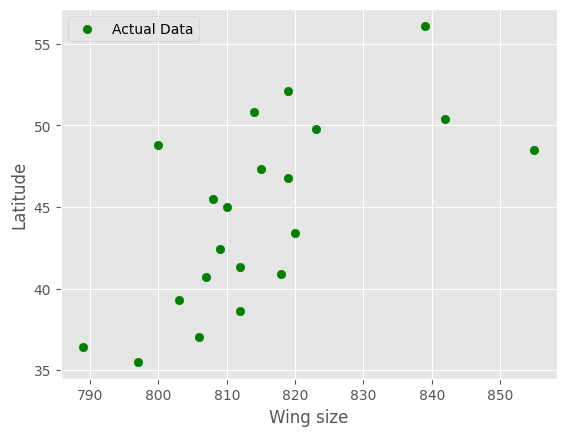

In [5]:
#Plot the data
plt.scatter(X_insects, y_insects, label="Actual Data", color='g')
plt.xlabel("Wing size")
plt.ylabel("Latitude")
plt.legend()
plt.show()

#### Step 3: Instantiate a LinearRegression Object

In [6]:
insects_regression = LinearRegression()

#### Step 4: Fit the model

In [7]:
insects_regression.fit(X_insects, y_insects)

LinearRegression()

#### Step 5: Predict Values

In [8]:
# Predict the target for the whole dataset
latitude_predictions = insects_regression.predict(X_insects)

#Predict the target for a new data point
new_insect = pd.DataFrame({
    'wingsize': [800]
})
new_insect['latitude'] = insects_regression.predict(new_insect)
print(f"New insect is:\n{new_insect}")

New insect is:
   wingsize   latitude
0       800  40.870569


#### Step 6: Plot the Predictions

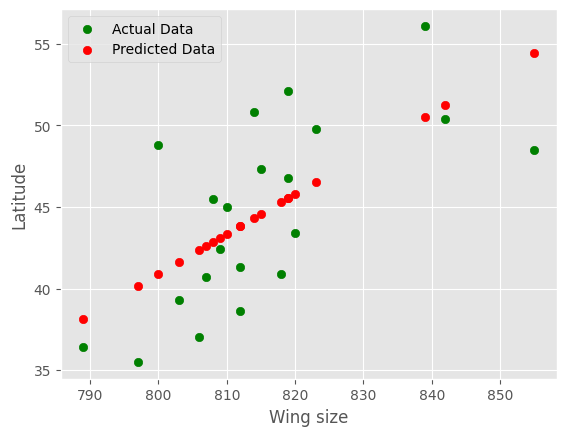

In [9]:
#Plot the predictions compared to the actual data
plt.scatter(X_insects, y_insects, label="Actual Data", color='g')
plt.scatter(X_insects, latitude_predictions, label="Predicted Data", c='r')
plt.xlabel("Wing size")
plt.ylabel("Latitude")
plt.legend()
plt.show()

#### Step 7: Evaluate The Model

In [10]:
#Get Evalutative Data from the model
print(f"Model coefficient :{insects_regression.coef_}")
print(f"Model y intercept :{insects_regression.intercept_}")
print(f"Model score :{insects_regression.score(X_insects,y_insects)}")
mae = mean_absolute_error(y_true=y_insects,y_pred=latitude_predictions) 
mse = mean_squared_error(y_true=y_insects,y_pred=latitude_predictions)
print("MAE:",mae) 
print("MSE:",mse) 
print()

#Manually Calculate the loss and cost of the model
model_loss = pd.DataFrame({
    'Target': y_insects,
    'Predicted result': latitude_predictions,
    'Loss': abs(y_insects - insects_regression.predict(X_insects).round(2))
})
model_cost = (1/model_loss.shape[0]) * (model_loss['Loss'].sum() / model_loss.shape[0])

print(f"The cost of this model is {model_cost:.5f}")
print(model_loss)

Model coefficient :[0.24706008]
Model y intercept :-156.77749557179794
Model score :0.43823454530425576
MAE: 3.6235280772732184
MSE: 17.429174492974532

The cost of this model is 0.17256
    Target  Predicted result  Loss
21    35.5         40.129389  4.63
22    37.0         42.352930  5.35
23    38.6         43.835290  5.24
24    40.7         42.599990  1.90
25    40.9         45.317651  4.42
26    42.4         43.094110  0.69
27    45.0         43.341170  1.66
28    46.8         45.564711  1.24
29    48.8         40.870569  7.93
30    49.8         46.552951  3.25
31    50.8         44.329410  6.47
32    36.4         38.152908  1.75
33    39.3         41.611749  2.31
34    41.3         43.835290  2.54
35    43.4         45.811771  2.41
36    45.5         42.847050  2.65
37    47.3         44.576470  2.72
38    48.5         54.458874  5.96
39    50.4         51.247093  0.85
40    52.1         45.564711  6.54
41    56.1         50.505912  5.59
